In [69]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
#Mounting
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
#Importing Data
data=pd.read_csv("/content/drive/MyDrive/bank-additional-full.xls",sep=";")

In [72]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41194,74.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41195,74.0,NaN,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41196,74.0,retired,married,NaN,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
#Checking the data discrepancies
#EDA
#1.Null Values
#2.Duplicates
#3.Outliers
#Visualization
#Data Preprocessing-LabelEncoder
#Feature Selection(Corr,VIF)
#Model Building
#Training the model
#Testing the model
#Evaluating the performance

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

In [75]:
data.isnull().sum().sum()

76

In [76]:
data.dropna(inplace=True)

In [77]:
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [78]:
data.duplicated().sum()

13

In [79]:
data.drop_duplicates(inplace=True)

In [80]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44.0,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no


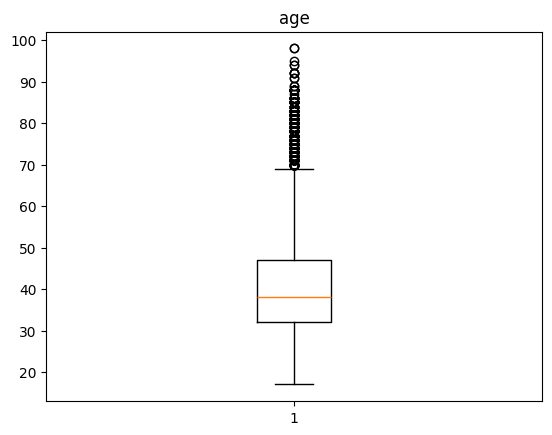

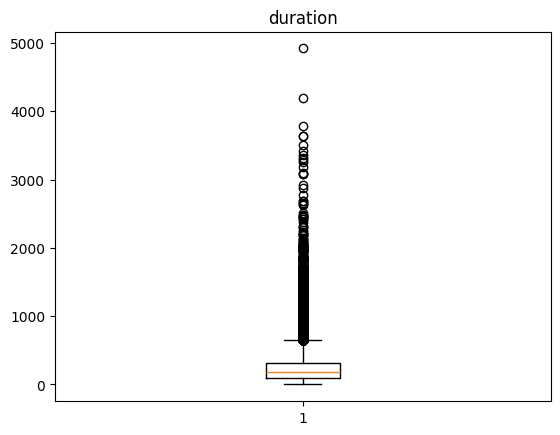

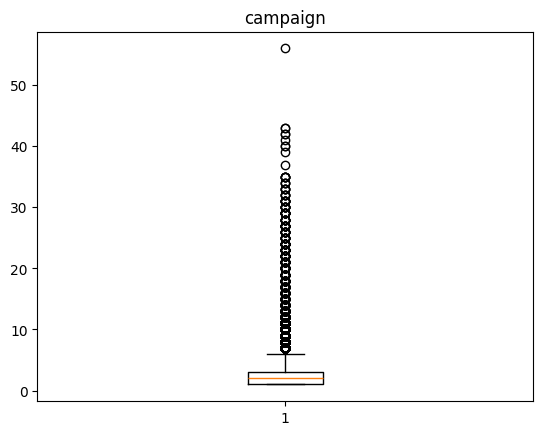

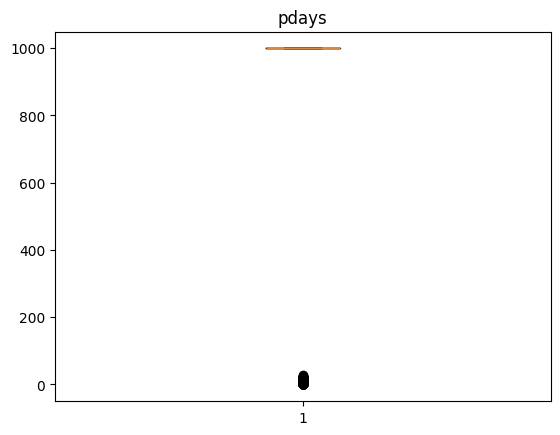

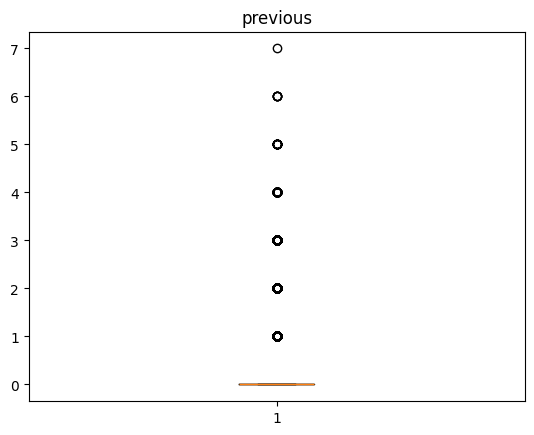

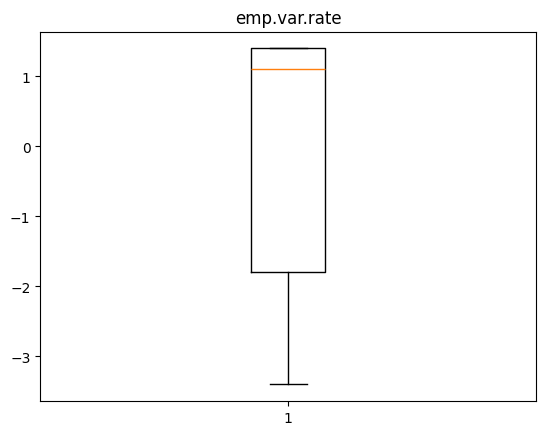

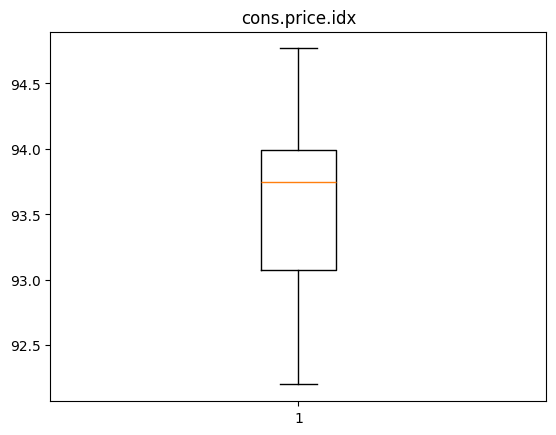

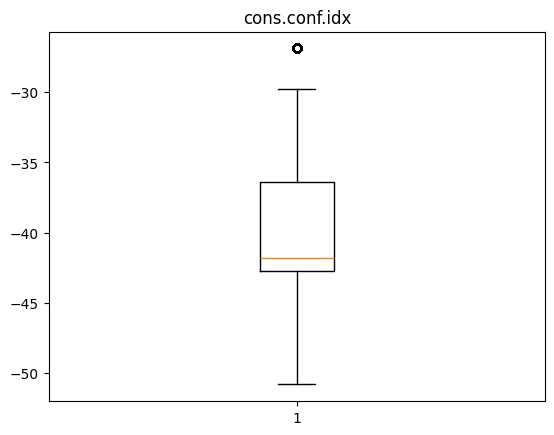

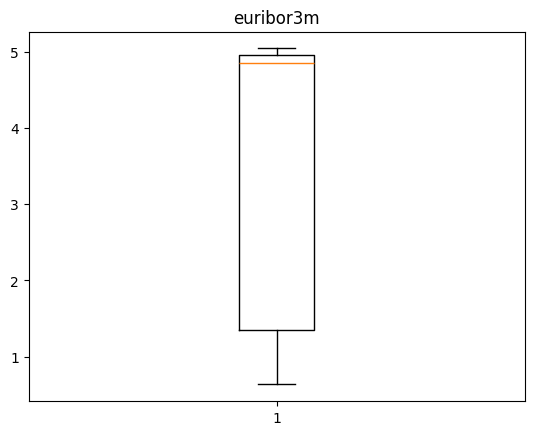

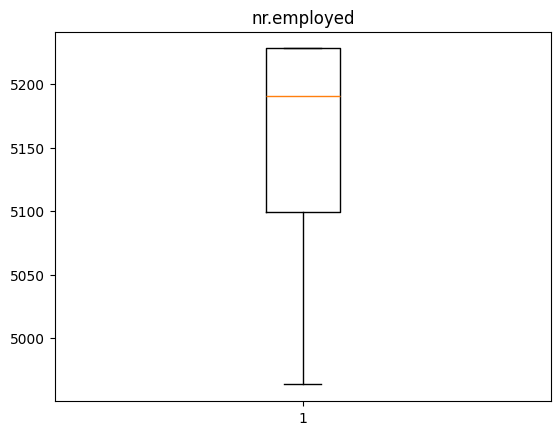

In [81]:
#Outliers
for col in data.columns:
    if data[col].dtype!="object":
        plt.boxplot(data[col])
        plt.title(col)
        plt.show()


In [82]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [83]:
data["pdays"].value_counts()

,count
pdays,
999.0,39662
3.0,439
6.0,412
4.0,118
9.0,64
2.0,61
7.0,60
12.0,58
10.0,52


In [84]:
out_cols=['age','duration','campaign','cons.conf.idx']

In [85]:
for col in out_cols:
  Q1=data[col].quantile(0.25)
  Q3=data[col].quantile(0.75)
  IQR=Q3-Q1
  UL=Q3+1.5*IQR
  LL=Q1-1.5*IQR
  data=data[(data[col]>=LL) & (data[col]<=UL)]

In [86]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37.0,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29.0,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1.0,9.0,1.0,success,-1.1,94.767,-50.8,1.028,4963.6,no
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


In [87]:
# label Encoding
from sklearn.preprocessing import LabelEncoder

In [88]:
le=LabelEncoder()


In [89]:
for col in data.columns:
  if data[col].dtype=="object":
    data[col]=le.fit_transform(data[col])
    print(le.classes_)

['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
['divorced' 'married' 'single' 'unknown']
['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']
['no' 'unknown' 'yes']
['no' 'unknown' 'yes']
['no' 'unknown' 'yes']
['cellular' 'telephone']
['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
['fri' 'mon' 'thu' 'tue' 'wed']
['failure' 'nonexistent' 'success']
['no' 'yes']


In [90]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,3,1,0,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,7,1,3,1,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,7,1,3,0,2,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,0,1,1,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,7,1,3,0,0,2,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37.0,0,1,6,0,2,0,0,7,0,...,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41182,29.0,10,2,0,0,2,0,0,7,0,...,1.0,9.0,1.0,2,-1.1,94.767,-50.8,1.028,4963.6,0
41184,46.0,1,1,5,0,0,0,0,7,0,...,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56.0,5,1,6,0,2,0,0,7,0,...,2.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6,0


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35165 entries, 0 to 41186
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             35165 non-null  float64
 1   job             35165 non-null  int64  
 2   marital         35165 non-null  int64  
 3   education       35165 non-null  int64  
 4   default         35165 non-null  int64  
 5   housing         35165 non-null  int64  
 6   loan            35165 non-null  int64  
 7   contact         35165 non-null  int64  
 8   month           35165 non-null  int64  
 9   day_of_week     35165 non-null  int64  
 10  duration        35165 non-null  float64
 11  campaign        35165 non-null  float64
 12  pdays           35165 non-null  float64
 13  previous        35165 non-null  float64
 14  poutcome        35165 non-null  int64  
 15  emp.var.rate    35165 non-null  float64
 16  cons.price.idx  35165 non-null  float64
 17  cons.conf.idx   35165 non-null  floa

In [92]:
#Feature Selection

In [93]:
data.corr()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.016762,-0.391334,-0.100854,0.191739,-0.005664,-0.005349,0.034921,-0.033203,-0.026799,...,0.012643,0.004257,-0.023142,0.018999,0.076681,0.041054,0.102274,0.088340,0.074006,-0.018263
job,-0.016762,1.000000,0.031943,0.142220,-0.031415,0.007615,-0.012510,-0.021930,-0.036545,0.000419,...,-0.009055,-0.026189,0.019105,0.010587,-0.000470,-0.008488,0.046472,-0.001156,-0.012086,0.023598
marital,-0.391334,0.031943,1.000000,0.106358,-0.083082,0.013370,0.005186,-0.064230,-0.012568,0.006159,...,-0.010908,-0.048035,0.048145,0.004515,-0.099130,-0.063965,-0.033756,-0.107473,-0.105750,0.064662
education,-0.100854,0.142220,0.106358,1.000000,-0.193624,0.013672,0.003972,-0.111465,-0.088087,-0.020234,...,-0.001028,-0.055519,0.043654,0.020334,-0.057126,-0.088639,0.085989,-0.049623,-0.057861,0.084367
default,0.191739,-0.031415,-0.083082,-0.193624,1.000000,-0.013665,0.000383,0.130619,-0.012913,-0.006132,...,0.023958,0.082030,-0.102442,0.022574,0.200101,0.161069,0.045235,0.191706,0.187036,-0.112272
housing,-0.005664,0.007615,0.013370,0.013672,-0.013665,1.000000,0.043047,-0.083344,-0.020588,0.001342,...,-0.009600,-0.007528,0.021192,-0.013932,-0.059711,-0.079804,-0.036152,-0.058325,-0.044891,0.014969
loan,-0.005349,-0.012510,0.005186,0.003972,0.000383,0.043047,1.000000,-0.006644,-0.002576,-0.010463,...,0.012337,-0.000353,0.000965,-0.003562,0.000100,-0.001680,-0.009488,-0.002251,0.000333,-0.007222
contact,0.034921,-0.021930,-0.064230,-0.111465,0.130619,-0.083344,-0.006644,1.000000,0.292769,-0.007871,...,0.043546,0.115705,-0.214777,0.126459,0.399120,0.604001,0.294017,0.402306,0.264713,-0.145123
month,-0.033203,-0.036545,-0.012568,-0.088087,-0.012913,-0.020588,-0.002576,0.292769,1.000000,0.036260,...,-0.033956,-0.032965,0.092854,-0.069198,-0.137305,0.034687,-0.046225,-0.080570,-0.182957,-0.022339
day_of_week,-0.026799,0.000419,0.006159,-0.020234,-0.006132,0.001342,-0.010463,-0.007871,0.036260,1.000000,...,-0.052079,-0.010495,-0.002972,0.018543,0.034629,0.006197,0.041691,0.040746,0.030968,0.013190


<Axes: >

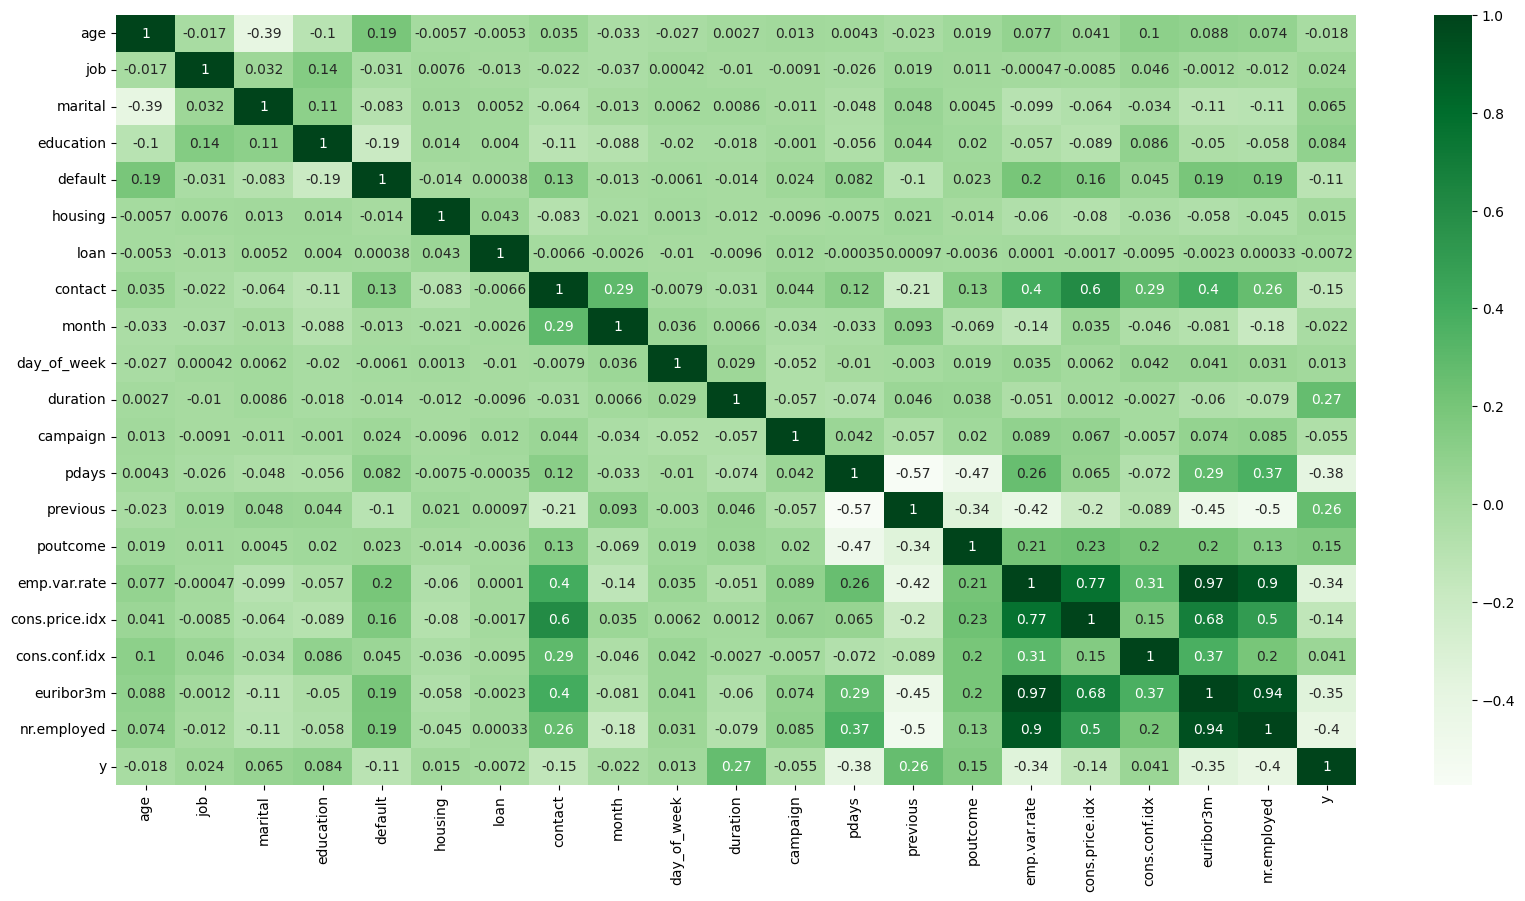

In [94]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,cmap="Greens")

In [95]:
#VIF-Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [96]:
x=data.drop(["y"],axis=1)

In [97]:
x

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56.0,3,1,0,0,0,0,1,6,1,261.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
1,57.0,7,1,3,1,0,0,1,6,1,149.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
2,37.0,7,1,3,0,2,0,1,6,1,226.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
3,40.0,0,1,1,0,0,0,1,6,1,151.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
4,56.0,7,1,3,0,0,2,1,6,1,307.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37.0,0,1,6,0,2,0,0,7,0,281.0,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6
41182,29.0,10,2,0,0,2,0,0,7,0,112.0,1.0,9.0,1.0,2,-1.1,94.767,-50.8,1.028,4963.6
41184,46.0,1,1,5,0,0,0,0,7,0,383.0,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56.0,5,1,6,0,2,0,0,7,0,189.0,2.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6


In [98]:
vif_X1 = variance_inflation_factor(x.values, 0)
print(f"VIF for X1: {vif_X1}")

VIF for X1: 22.11399267672683


In [99]:
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["Muticolinearity_value"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,Muticolinearity_value
0,age,22.113993
1,job,2.100861
2,marital,5.690071
3,education,4.560285
4,default,1.411946
5,housing,2.212409
6,loan,1.208306
7,contact,2.942422
8,month,6.685085
9,day_of_week,3.099808


In [100]:
x.drop(["nr.employed"],axis=1,inplace=True)

In [101]:
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["Muticolinearity_value"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,Muticolinearity_value
0,age,22.107715
1,job,2.100612
2,marital,5.689362
3,education,4.558657
4,default,1.409350
5,housing,2.212084
6,loan,1.208260
7,contact,2.446094
8,month,5.784547
9,day_of_week,3.098930


In [102]:
x.drop(["cons.price.idx"],axis=1,inplace=True)

In [103]:
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["Muticolinearity_value"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,Muticolinearity_value
0,age,20.980560
1,job,2.095040
2,marital,5.544426
3,education,4.503309
4,default,1.409322
5,housing,2.210417
6,loan,1.207694
7,contact,2.348235
8,month,5.726141
9,day_of_week,3.084650


In [104]:
x.drop(["pdays"],axis=1,inplace=True)

In [105]:
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["Muticolinearity_value"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,Muticolinearity_value
0,age,20.156176
1,job,2.091851
2,marital,5.426164
3,education,4.449798
4,default,1.409226
5,housing,2.206690
6,loan,1.207556
7,contact,2.274814
8,month,5.664673
9,day_of_week,3.072542


In [106]:
x.drop(["euribor3m"],axis=1,inplace=True)

In [107]:
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["Muticolinearity_value"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,Muticolinearity_value
0,age,17.204219
1,job,2.085747
2,marital,5.226350
3,education,4.292137
4,default,1.408832
5,housing,2.198757
6,loan,1.207316
7,contact,2.266725
8,month,5.270616
9,day_of_week,3.032416


In [108]:
x.drop(["cons.conf.idx"],axis=1,inplace=True)

In [109]:
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["Muticolinearity_value"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,Muticolinearity_value
0,age,11.058997
1,job,2.076503
2,marital,4.372058
3,education,4.193335
4,default,1.407850
5,housing,2.162435
6,loan,1.204070
7,contact,2.242675
8,month,4.871672
9,day_of_week,2.969072


In [110]:
x.drop(["age"],axis=1,inplace=True)

In [111]:
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["Muticolinearity_value"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,Muticolinearity_value
0,job,2.053348
1,marital,4.351772
2,education,4.013198
3,default,1.323133
4,housing,2.112544
5,loan,1.200876
6,contact,2.241469
7,month,4.605944
8,day_of_week,2.888478
9,duration,2.988925


In [112]:
x.drop(["poutcome"],axis=1,inplace=True)

In [113]:
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["Muticolinearity_value"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,Muticolinearity_value
0,job,2.034164
1,marital,4.135585
2,education,3.788774
3,default,1.313522
4,housing,2.080645
5,loan,1.198855
6,contact,2.225619
7,month,4.490123
8,day_of_week,2.803667
9,duration,2.834777


We can see that multicolinearity value of all the features are within 5. Now we can go ahead and split the data for training and testing.

In [114]:
y=data["y"]
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
41181,1
41182,0
41184,0
41185,0


In [115]:
#Splitting the data into train and test

In [116]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [117]:
x_train

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate
27108,0,0,6,0,2,0,0,7,0,195.0,1.0,0.0,-0.1
28020,9,2,5,0,0,0,0,0,2,121.0,1.0,1.0,-1.8
36195,11,1,0,0,2,2,0,6,2,110.0,2.0,0.0,-1.8
31823,1,1,0,0,1,1,0,6,2,67.0,3.0,0.0,-1.8
7448,7,2,5,0,2,0,1,6,0,120.0,3.0,0.0,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19780,1,1,0,1,2,0,0,1,0,205.0,1.0,0.0,1.4
7043,7,2,3,0,0,0,1,6,2,70.0,2.0,0.0,1.1
13010,1,2,2,0,2,0,0,3,3,154.0,3.0,0.0,1.4
910,1,0,1,1,2,0,1,6,4,107.0,1.0,0.0,1.1


In [118]:
y_train

,y
27108,0
28020,0
36195,0
31823,0
7448,0
...,...
19780,0
7043,0
13010,0
910,0


In [119]:
x_test

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate
13886,5,1,6,0,2,0,0,3,0,188.0,2.0,0.0,1.4
21624,0,1,6,0,2,0,0,1,3,154.0,1.0,0.0,1.4
30053,11,1,0,0,2,0,0,0,2,477.0,2.0,0.0,-1.8
13645,6,1,2,0,0,0,0,3,2,259.0,1.0,0.0,1.4
37419,8,2,0,0,2,0,0,1,4,267.0,1.0,0.0,-2.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7612,0,1,3,0,0,0,1,6,0,80.0,2.0,0.0,1.1
25891,0,1,6,0,0,0,0,7,4,117.0,1.0,0.0,-0.1
23025,1,1,2,1,2,0,0,1,3,60.0,4.0,0.0,1.4
9916,1,0,3,0,0,0,1,4,4,134.0,2.0,0.0,1.4


In [120]:
y_test


,y
13886,0
21624,0
30053,0
13645,0
37419,1
...,...
7612,0
25891,0
23025,0
9916,0


Model Building

In [121]:
from sklearn.linear_model import LogisticRegression

In [122]:
model=LogisticRegression()

In [123]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [124]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [125]:
print(len(y_test))
print(len(y_pred))


10550
10550


In [126]:
#Evaluating the model

In [127]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[9591,  178],
       [ 604,  177]])

In [128]:
accuracy_score(y_test,y_pred)

0.9258767772511848

<Axes: >

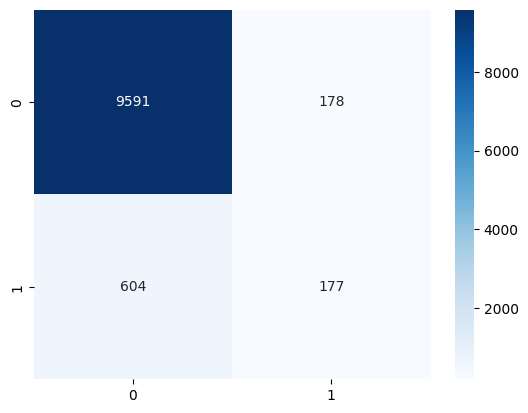

In [129]:
sns.heatmap(cm,cmap="Blues",annot=True,fmt="d")

In [130]:
# checking the overfitting by checking it for training data
y_pred_train=model.predict(x_train)
y_pred_train

array([0, 0, 0, ..., 0, 0, 0])

In [131]:
accuracy_score(y_train,y_pred_train)

0.9214706479788747